In [1]:
# Load modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cmcrameri.cm as cmc
import cartopy.feature as cf                                                                                                        
from pathlib import Path
import psyplot.project as psy
import sys
import datetime as dt
from iconarray.plot import formatoptions # import plotting formatoptions (for use with psyplot)
import iconarray as iconvis # import self-written modules from iconarray
import matplotlib.patheffects as PathEffects
import metpy.calc as calc
import metpy.units as units

# #own scripts
sys.path.append('../utilities_tlezuo/')
import timefunctions as tf
import varfunctions as vf
import locfunctions as lf

# show figures after they are drawn or updated
psy.rcParams['auto_show'] = True
%matplotlib inline
%config InlineBackend.close_figures = False

#  define class of pc_dict
class Point_coordinates:
    def __init__(self, shortname, name, color, marker, lat, lon, altitude, iconID, iconHSURF, iconHHL, iconHFL, height_dict):
        self.short = shortname
        self.name = name
        self.color = color
        self.marker = marker
        self.lat = lat
        self.lon = lon
        self.alt = altitude
        self.iconID = iconID 
        self.iconHSURF = iconHSURF
        self.iconHHL = iconHHL
        self.iconHFL = iconHFL
        self.hdict = height_dict 
# load pc_dict and its lists
pc_dict = np.load('../utilities_tlezuo/pc_dict.npy',allow_pickle=True).item()

In [34]:
plotdate = dt.datetime(2019,9,14,5,00)
simdate = dt.datetime(2019,9,12,12,00)
lt = tf.get_lt(plotdate,simdate)

print(lt)
lfff_name =tf.lfff_name(lt)
filename = 'lfffp'+lfff_name[4:]
nc_file = '/store/s83/tlezuo/RUN5_extended/out_p/'+filename
# If necessary, add the corresponding grid file:
grid_file = '../data/example_data/grids/ICON-1E_DOM01.nc'

if iconvis.check_grid_information(nc_file):
    print('The grid information is available')
    data = psy.open_dataset(nc_file)
else:
    print('The grid information is not available')
    data = iconvis.combine_grid_information(nc_file,grid_file)

print(filename)

41.0
The grid information is available
lfffp01170000.nc


In [35]:
# ## MASK NONSENSE CELLS ##
# data_c = psy.open_dataset('/store/s83/swester/teamx/tdf_2019091212/output/19091212/lfff00000000c.nc') # load constant file
# data.assign(geop_H=calc.geopotential_to_height(data.FI))    # calculate geopotential height from geopotential, using metpy function
# data=data.where(data_c.HSURF.values<data.geop_H.values)     # mask ncells where geopot_H > HSURF

# # test calc geopot
# calc.geopotential_to_height(7006.59254076 * units.units('meter ** 2 / second ** 2'))

# # example to visualize that icon levels go below topography elevation
# loc = pc_dict['ZUG']    # location
# plev=80000              # in Pa
# print(loc.name)
# print('topography height '+str(data_c.sel(ncells=loc.iconID).HSURF.values))
# print('geopotential of '+str(plev/100)+'hPa plev'+ str(data.sel(plev=plev,ncells=loc.iconID).FI.values))                   # select geopotential
# print('geopotential height of '+str(plev/100)+'hPa plev '+ str(data.sel(plev=plev,ncells=loc.iconID).geop_H.values))       # select previously calculated geopotential height

plotting area lower Inn Valley
     plotting variable T


/scratch/tlezuo/miniconda3/envs/psyplot/lib/python3.9/site-packages/psy_simple/plugin.py:276: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if b is None or b == 'none':


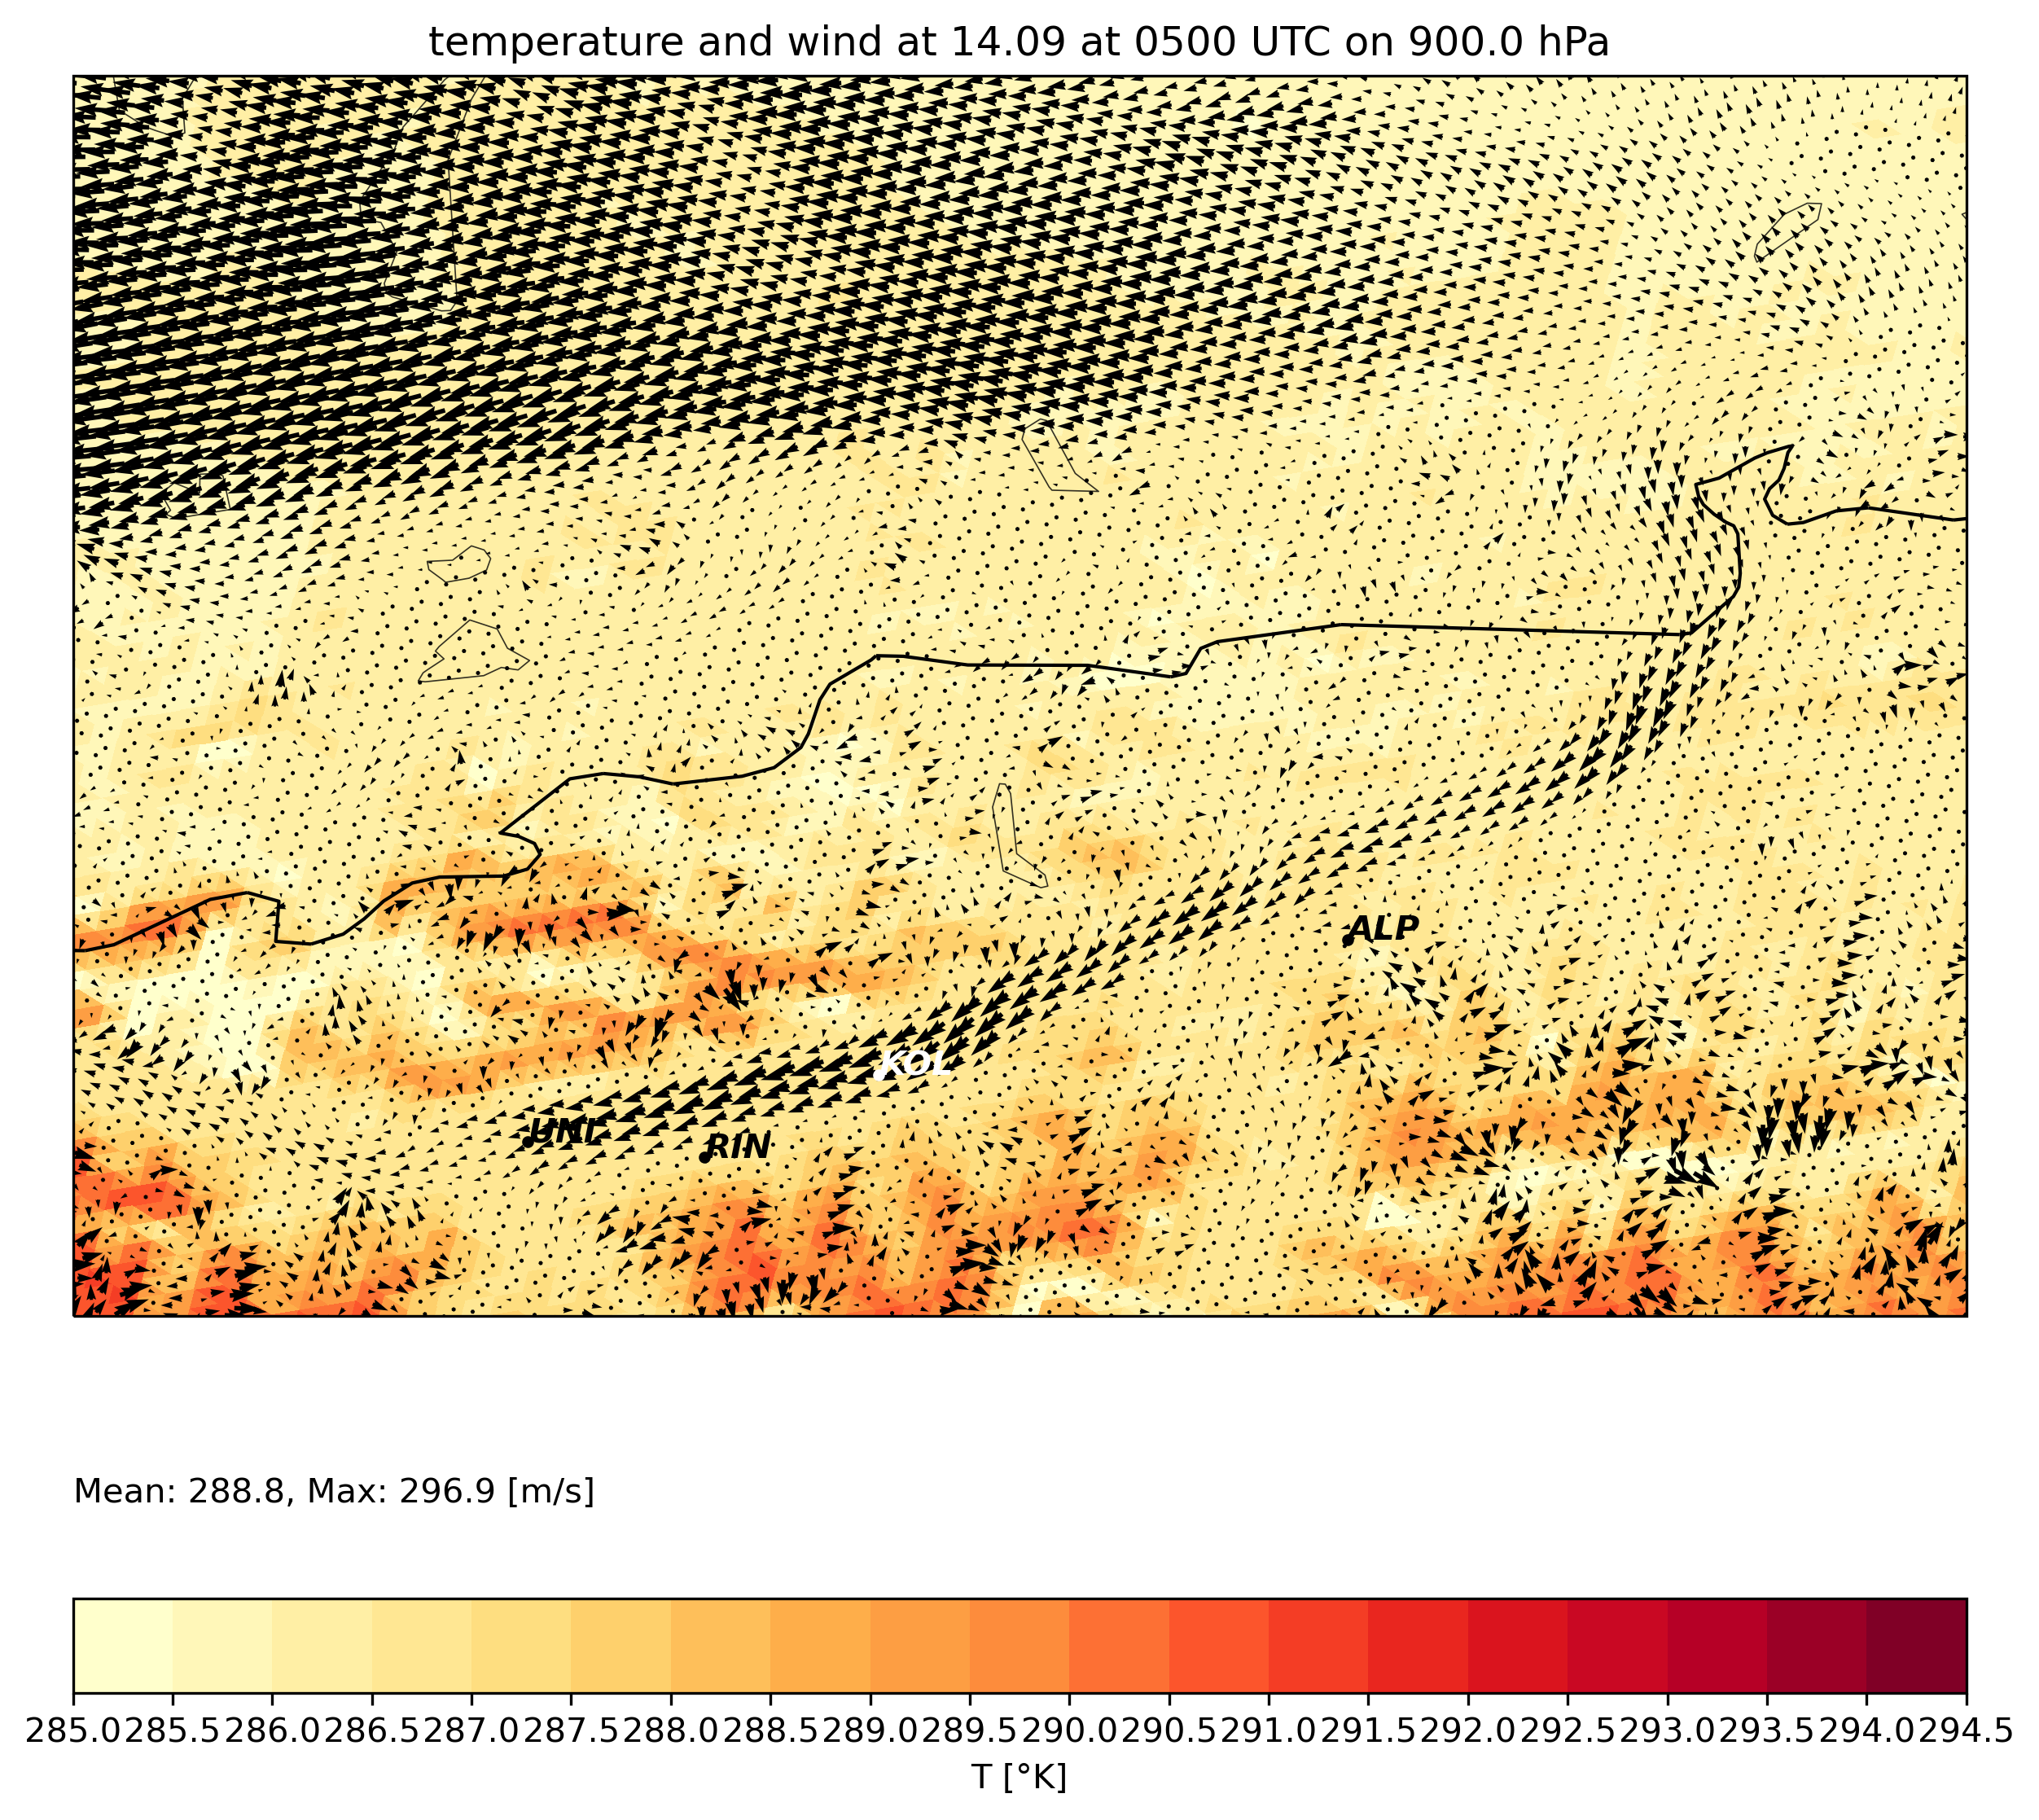

In [36]:

###############################################################################################
## DECIDE ##

# area
area=lf.lower_valley
# pressure level
PL = 90000

# variable
pvar = vf.T

# points
# pc_innvalley_list = ['LAN','IMS','HAI','MUC','ALP','RIN','UNI','murs']
pc_innvalley_list = ['ALP','RIN','UNI','kols']

# where to save
plotpath_base = '/scratch/tlezuo/icon-vis/hor_cross/'
lake_tf=True
bord_tf=True
ab='a)'
x_grid= False
y_grid = False
plottype = 'poly' # 'poly' = triangles,'contourf'= smoothed, 'contour'= lines

###############################################################################################
## PLOT SETUP ##
print('plotting area '+area.name)
print('     plotting variable '+pvar.name )
# path sepcific to area and variable
plotpath = plotpath_base+str(area.name)+'/'+str(pvar.name)+'/'
Path(plotpath).mkdir(parents=True, exist_ok=True)
# title specific to area, variable, time
title = 'temperature and wind at '+plotdate.strftime('%d.%m at %H%M UTC')+' on '+str(PL/100)+' hPa'
plotname = str(area.name)+'_'+pvar.name+'_'+str(PL)+'_'+plottype+'.png'

###############################################################################################
## PLOT ##
psy.plot.mapcombined(data.sel(plev=PL),
                                name=[['T', 
                                ['U', 'V']]], 
                                map_extent = [area.lonmin, area.lonmax, area.latmin, area.latmax],
                                plot=plottype,
                                arrowsize=200,
                                bounds = np.arange(285,295,0.5),
                                title = title,
                                cmap=pvar.cmap,
                                cticks=np.arange(285,295,0.5),
                                clabel = pvar.name+' '+pvar.units,
                                xgrid = x_grid, ygrid = y_grid,
                                cbar = 'b',#'b,r False',
                                lakes=lake_tf,
                                borders=bord_tf,
                                # background = 'grey'
                                  
                                  )

# figure
fig = plt.figure
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.rcParams['figure.dpi'] = 300
# plt.title(ab,loc='left')

#annotations
pc_dict['murs'].short = 'MUA'
pc_dict['kols'].short = 'KOL'
pc_dict['egg'].short = 'EGG'
pc_dict['terf'].short = 'TER'
pc_dict['arb'].short = 'ARB'
pc_dict['hoch'].short = 'HOC'
pc_dict['weer'].short = 'WEE'
for locmark in pc_innvalley_list:
    
    if pc_dict[locmark].short == 'KOL' or pc_dict[locmark].short == 'MUA' :
        col_marker = 'w'#'violet'
    else:
        col_marker = 'k'#'violet'
    pos_lon, pos_lat = iconvis.add_coordinates(pc_dict[locmark].lon,pc_dict[locmark].lat,area.lonmin,area.lonmax,area.latmin,area.latmax)
    mark = fig.axes[0].plot(pos_lon, pos_lat,color=col_marker,marker='.',markersize=5, transform=fig.axes[0].transAxes,label=pc_dict[locmark].name,linestyle='None',zorder=101)
                            #,path_effects=[PathEffects.Stroke(linewidth=3, foreground='k'), PathEffects.Normal()]) 
    mtxt = fig.axes[0].annotate(text=pc_dict[locmark].short,xy=(pos_lon, pos_lat),xycoords='axes fraction',zorder=100,color=col_marker, style = 'oblique',weight='bold')

# save figure
# plt.savefig('4_bbbbb'+ab,dpi=300)

# pp.update()

In [37]:
startdate_model = dt.datetime(2019,9,14,3,00)
enddate_model = dt.datetime(2019,9,14,12,00)
pdates_list = pd.date_range(startdate_model,enddate_model,freq='3H')

plotting area eastern_alps
     plotting variable T


/scratch/tlezuo/miniconda3/envs/psyplot/lib/python3.9/site-packages/psy_simple/plugin.py:276: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if b is None or b == 'none':


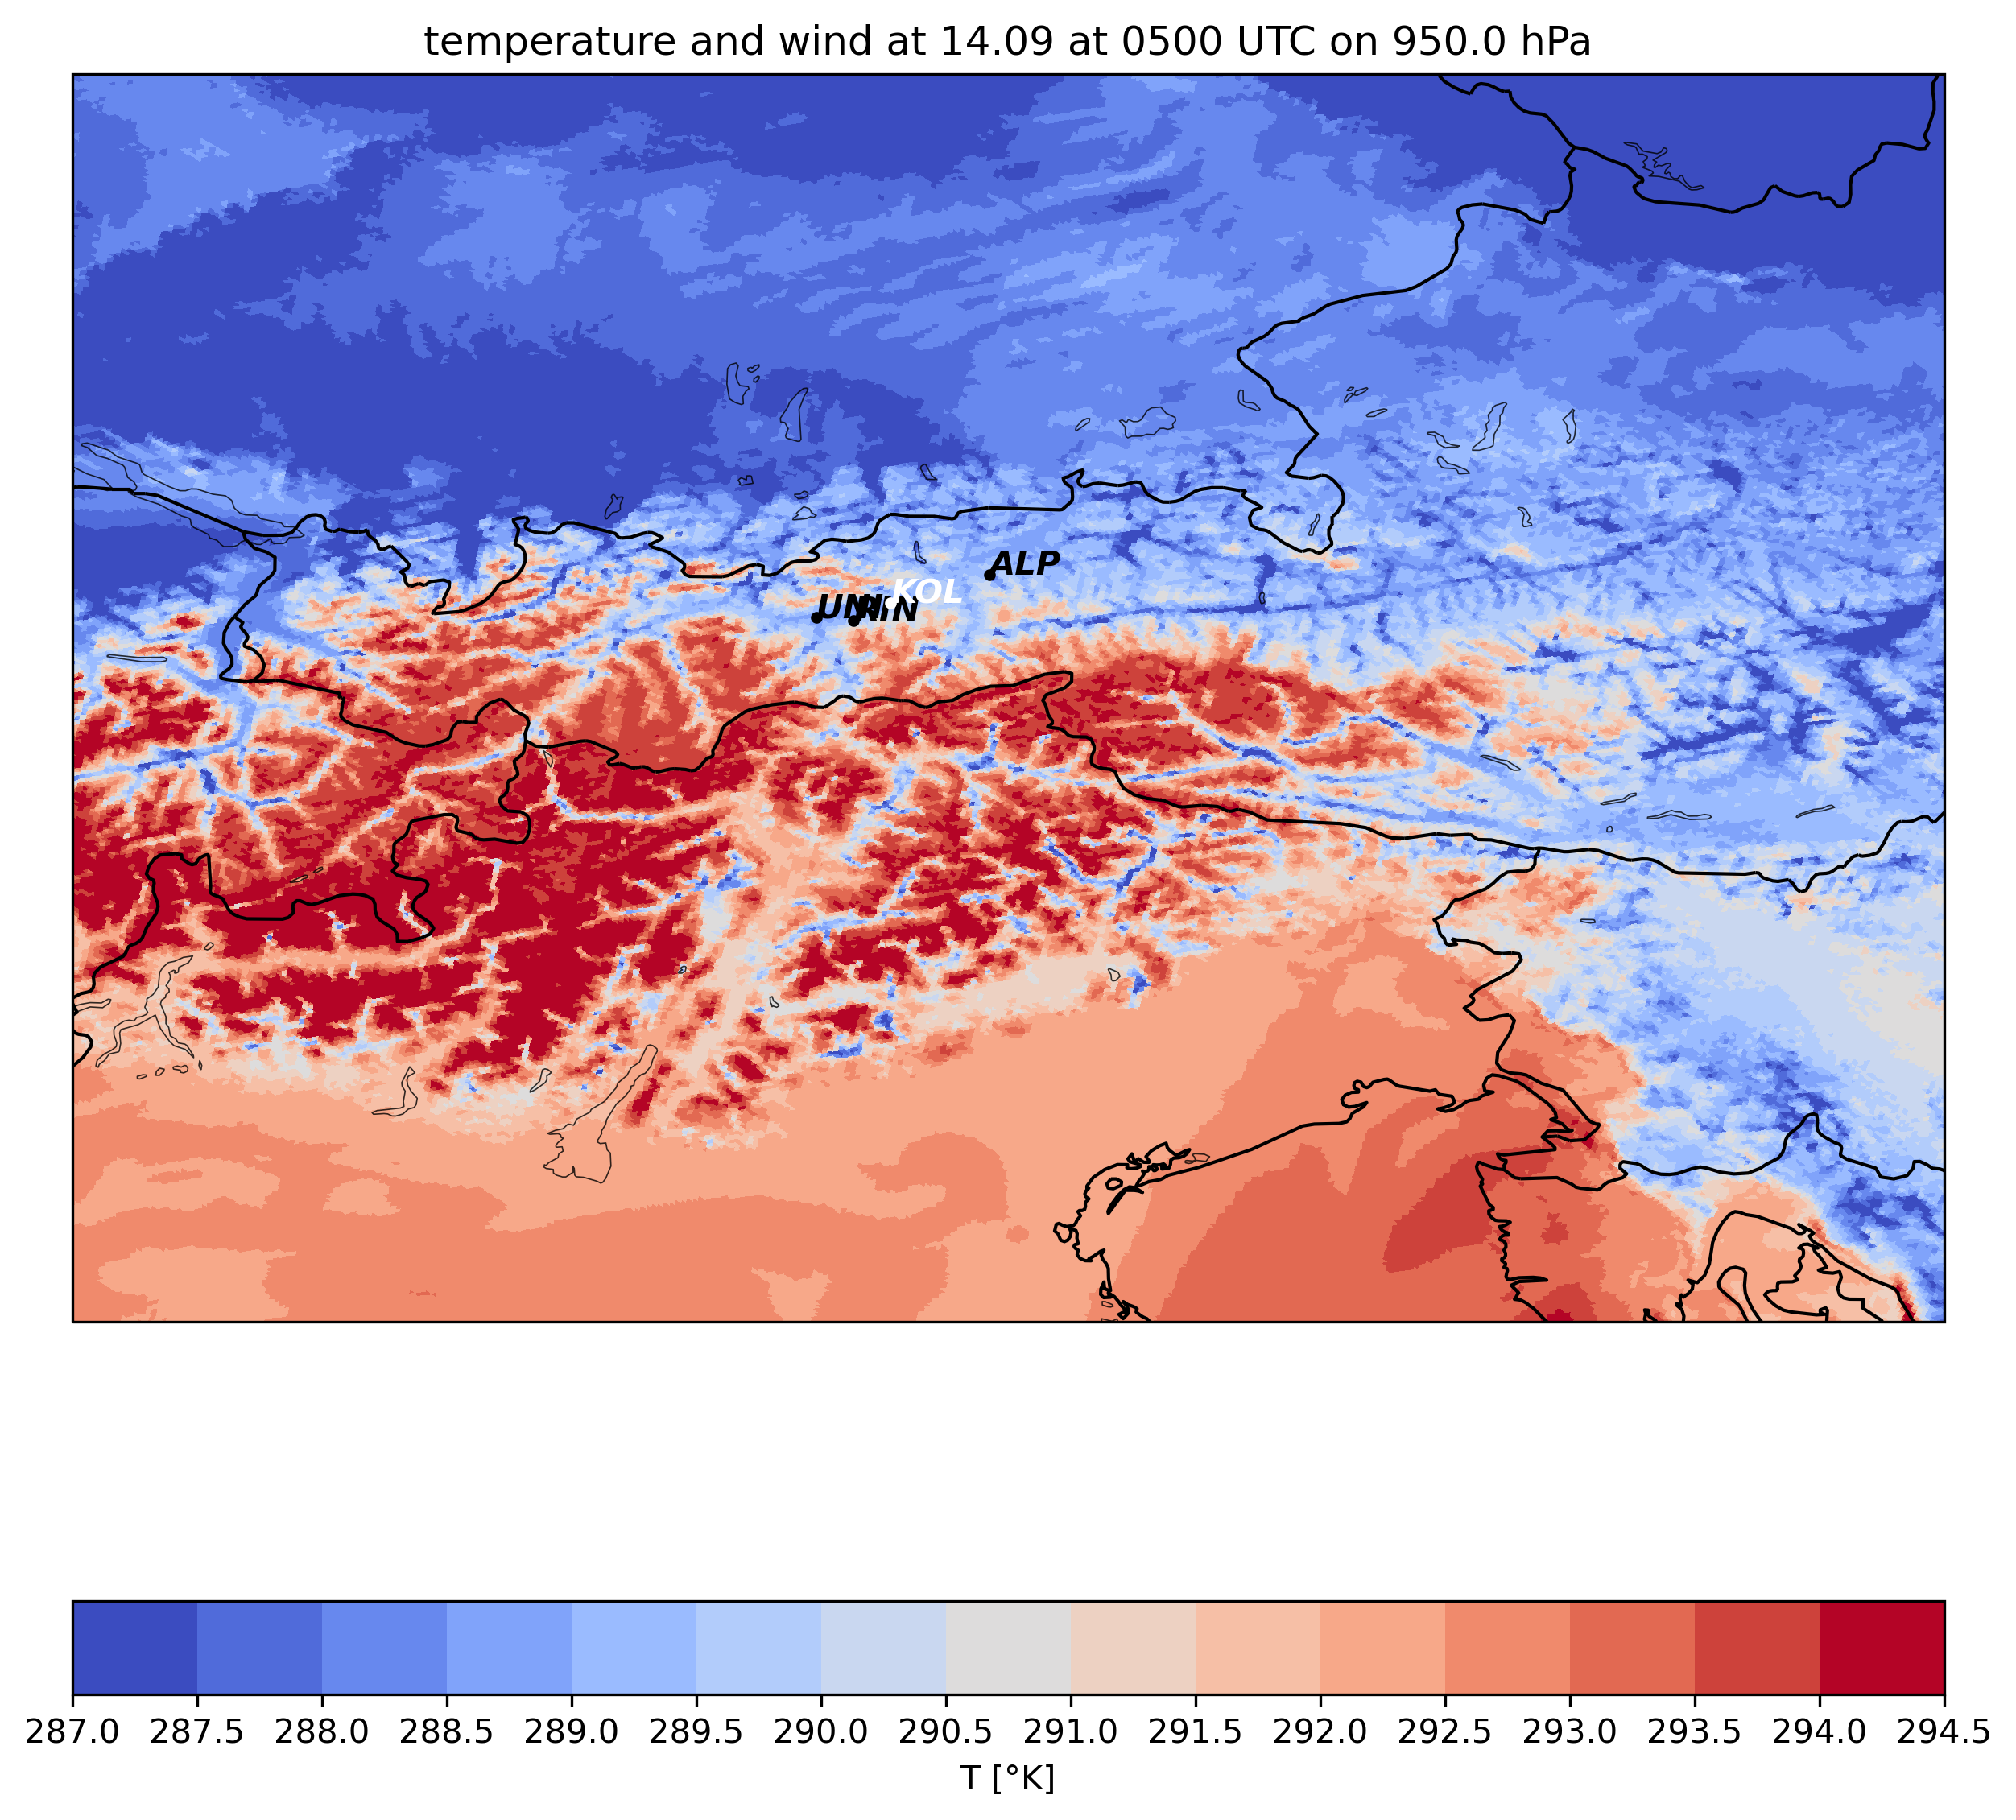

In [38]:

############################################ only MAPPLOT, no wind arrows ###################################################
## DECIDE ##

# area
area=lf.eastern_alps
# pressure level
PL = 95000

# variable
pvar = vf.T

if PL == 85000:
    levels = np.arange(282,288,0.5)
elif PL == 95000:
    levels = np.arange(287,295,0.5)

# points
# pc_innvalley_list = ['LAN','IMS','HAI','MUC','ALP','RIN','UNI','murs']
pc_innvalley_list = ['ALP','RIN','UNI','kols']

# where to save
plotpath_base = '/scratch/tlezuo/icon-vis/hor_cross/'
lake_tf=True
bord_tf=True
ab='a)'
x_grid= False
y_grid = False
plottype = 'poly' # 'poly' = triangles,'contourf'= smoothed, 'contour'= lines

###############################################################################################
## PLOT SETUP ##
print('plotting area '+area.name)
print('     plotting variable '+pvar.name )
# path sepcific to area and variable
plotpath = plotpath_base+str(area.name)+'/'+str(pvar.name)+'/'
Path(plotpath).mkdir(parents=True, exist_ok=True)
# title specific to area, variable, time
title = 'temperature and wind at '+plotdate.strftime('%d.%m at %H%M UTC')+' on '+str(PL/100)+' hPa'
plotname = str(area.name)+'_'+pvar.name+'_'+str(PL)+'_'+plottype+'.png'

###############################################################################################
## PLOT ##
psy.plot.mapplot(data.sel(plev=PL),
                                name=pvar.name, 
                                map_extent = [area.lonmin, area.lonmax, area.latmin, area.latmax],
                                plot=plottype,
                                bounds =levels,
                                title = title,
                                cmap='coolwarm',
                                cticks=levels,
                                clabel = pvar.name+' '+pvar.units,
                                xgrid = x_grid, ygrid = y_grid,
                                cbar = 'b',#'b,r False',
                                lakes=lake_tf,
                                borders=bord_tf,
                                # background = 'grey'
                                  
                                  )

# figure
fig = plt.figure
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.rcParams['figure.dpi'] = 300
# plt.title(ab,loc='left')

#annotations
pc_dict['murs'].short = 'MUA'
pc_dict['kols'].short = 'KOL'
pc_dict['egg'].short = 'EGG'
pc_dict['terf'].short = 'TER'
pc_dict['arb'].short = 'ARB'
pc_dict['hoch'].short = 'HOC'
pc_dict['weer'].short = 'WEE'
for locmark in pc_innvalley_list:
    
    if pc_dict[locmark].short == 'KOL' or pc_dict[locmark].short == 'MUA' :
        col_marker = 'w'#'violet'
    else:
        col_marker = 'k'#'violet'
    pos_lon, pos_lat = iconvis.add_coordinates(pc_dict[locmark].lon,pc_dict[locmark].lat,area.lonmin,area.lonmax,area.latmin,area.latmax)
    mark = fig.axes[0].plot(pos_lon, pos_lat,color=col_marker,marker='.',markersize=5, transform=fig.axes[0].transAxes,label=pc_dict[locmark].name,linestyle='None',zorder=101)
                            #,path_effects=[PathEffects.Stroke(linewidth=3, foreground='k'), PathEffects.Normal()]) 
    mtxt = fig.axes[0].annotate(text=pc_dict[locmark].short,xy=(pos_lon, pos_lat),xycoords='axes fraction',zorder=100,color=col_marker, style = 'oblique',weight='bold')

# save figure
# plt.savefig('4_bbbbb'+ab,dpi=300)

# pp.update()

In [39]:
# area=lf.zoom
# ppv = psy.plot.mapvector(data.sel(plev=90000), 
#                     name=[['U', 'V']], 
#                     map_extent = [area.lonmin, area.lonmax, area.latmin, area.latmax],
#                     arrowsize=20)


In [40]:
# data['VEL'] = vf.calculate_wind_vel_from_uv(data.U,data.V)
# data.assign(VEL=lambda x: np.sqrt(data.U**2 + data.V**2))
# data.VEL.attrs = data.U.attrs
# data.U.sel(plev=92500).dims

In [41]:
# area=lf.zoom
# psy.plot.mapcombined(data.sel(plev=92500),
#                                  name=[['W', 
#                                   ['U', 'V']]], 
#                                   map_extent = [area.lonmin, area.lonmax, area.latmin, area.latmax],
#                                 arrowsize=20)

In [42]:
# area=lf.zoom
# psy.plot.mapcombined(data.sel(plev=92500),
#                                  name=[['V', 
#                                   ['U', 'V']]], 
#                                   map_extent = [area.lonmin, area.lonmax, area.latmin, area.latmax],
#                                   density=0.001, 
#                                 arrowsize=20)